In [1]:
# Game Hawk-Dove
import numpy as np
import matplotlib.pyplot as plt

In [14]:
V0 = 1.
C0 = 1.5
L = 200 #number of time steps
A = 0.1 # amplitude of sinusodial noise

# Payoff Matrix: NOW CHANGES during for-loop
M = np.matrix([[0.5*(V0-C0), V0], [0, V0/2.]])

# Initial population distribution
Pop = np.array([0.5,0.5])
print("Payoff matrix:")
print(M)

Payoff matrix:
[[-0.25  1.  ]
 [ 0.    0.5 ]]


In [26]:
Hawks = np.empty(L)
Doves = np.empty(L)
print(Hawks[0])
print(Pop[0])
print(type(Pop))

for i in range(L):
    Hawks[i] = Pop[0]
    Doves[i] = Pop[1]
    V = V0 + A*np.sin(i)
    print(i,np.round(V,2))
    M = np.matrix([[0.5*(V-C0), V], [0, V/2.]])
    G = np.asarray(np.matmul(M, Pop)).reshape(-1) # Gewinn der Spielrunde
    r = G/(np.matmul(Pop,G) ) # Replicator Equation
    Pop = Pop * r

6.915409547811e-310
0.6034693219115598
<class 'numpy.ndarray'>
0 1.0
1 1.08
2 1.09
3 1.01
4 0.92
5 0.9
6 0.97
7 1.07
8 1.1
9 1.04
10 0.95
11 0.9
12 0.95
13 1.04
14 1.1
15 1.07
16 0.97
17 0.9
18 0.92
19 1.01
20 1.09
21 1.08
22 1.0
23 0.92
24 0.91
25 0.99
26 1.08
27 1.1
28 1.03
29 0.93
30 0.9
31 0.96
32 1.06
33 1.1
34 1.05
35 0.96
36 0.9
37 0.94
38 1.03
39 1.1
40 1.07
41 0.98
42 0.91
43 0.92
44 1.0
45 1.09
46 1.09
47 1.01
48 0.92
49 0.9
50 0.97
51 1.07
52 1.1
53 1.04
54 0.94
55 0.9
56 0.95
57 1.04
58 1.1
59 1.06
60 0.97
61 0.9
62 0.93
63 1.02
64 1.09
65 1.08
66 1.0
67 0.91
68 0.91
69 0.99
70 1.08
71 1.1
72 1.03
73 0.93
74 0.9
75 0.96
76 1.06
77 1.1
78 1.05
79 0.96
80 0.9
81 0.94
82 1.03
83 1.1
84 1.07
85 0.98
86 0.91
87 0.92
88 1.0
89 1.09
90 1.09
91 1.01
92 0.92
93 0.91
94 0.98
95 1.07
96 1.1
97 1.04
98 0.94
99 0.9
100 0.95
101 1.05
102 1.1
103 1.06
104 0.97
105 0.9
106 0.93
107 1.02
108 1.09
109 1.08
110 1.0
111 0.91
112 0.91
113 0.99
114 1.08
115 1.09
116 1.02
117 0.93
118 0.9
119 0.9

In [37]:
# Calculate ESS
Dove_ESS = (C0-V0)/C0
Hawk_ESS = 1-Dove_ESS
print(Dove_ESS, Hawk_ESS)

0.3333333333333333 0.6666666666666667


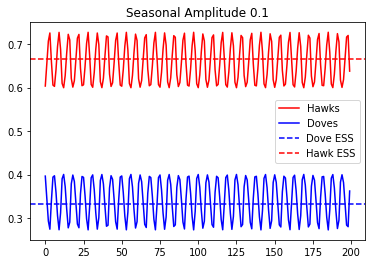

In [47]:
plt.plot(np.arange(L), Hawks, label="Hawks", color = "red")
plt.plot(np.arange(L), Doves,label="Doves", color = "blue")
plt.axhline(y=Dove_ESS,linestyle= "dashed", label="Dove ESS", color = "blue")
plt.axhline(y=Hawk_ESS, linestyle="dashed", label="Hawk ESS", color = "red")
plt.title("Seasonal Amplitude "+str(A))
plt.legend()
plt.show()

## Or all in one Function

In [64]:
def PrintPopulations(v,c, x0, A = 0.0, L=200):
    # takes reward v and cost c, sinus Amplitude A and initial dove population x0
    # prints population dynamics for L time steps
    
    V = v
    C = c

    # Payoff Matrix: 
    M = np.matrix([[0.5*(V-C), V], [0, V/2.]])

    # Initial population distribution
    Pop = np.array([x0,1-x0])
    
    Hawks = np.empty(L)
    Doves = np.empty(L)
    
    
    for i in range(L):
        Hawks[i] = Pop[0]
        Doves[i] = Pop[1]
    
         # Payoff Matrix WITH SINUS:
        V = v + A*np.sin(i)
        M = np.matrix([[0.5*(V-C), V], [0, V/2.]])
        G = np.asarray(np.matmul(M, Pop)).reshape(-1) # Gewinn der Spielrunde
        r = G/(np.matmul(Pop,G) ) # Replicator Equation
        Pop = Pop * r
        
    # Calculate ESS
    DOVE_ESS = (c-v)/c
    HAWK_ESS = 1-DOVE_ESS
    
    # Plot the resulting time series
    plt.plot(np.arange(L), Hawks, label="Hawks", color = "red")
    plt.plot(np.arange(L), Doves,label="Doves", color = "blue")
    plt.axhline(y=DOVE_ESS,linestyle= "dashed", label="Dove ESS", color = "blue")
    plt.axhline(y=HAWK_ESS, linestyle="dashed", label="Hawk ESS", color = "red")
    plt.title("V="+str(np.round(v,2))+", C="+str(np.round(c,2))+", x(0)="+str(np.round(x0,2)) + ", A="+str(np.round(A,2))  )
    plt.legend()
    return(plt)

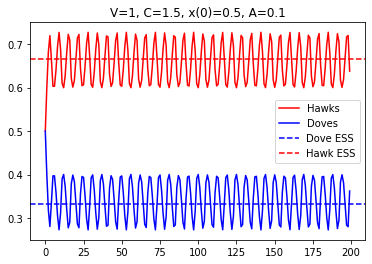

In [72]:
# test the function
PLT = PrintPopulations(1, 1.5, 0.5, 0.1)
PLT.show()

Looks exactly like the previous plot

## For some different amplitude levels

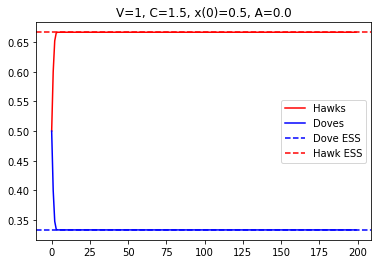

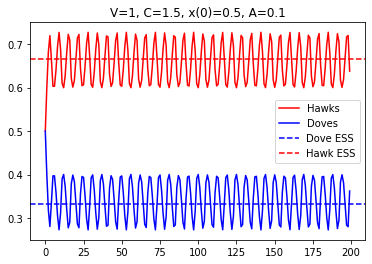

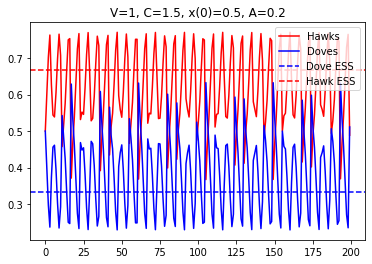

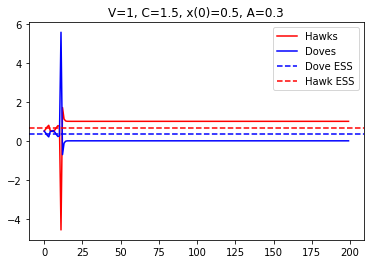

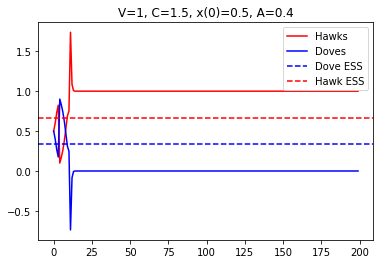

In [79]:
for j in range(5):
    PLT = PrintPopulations(1, 1.5, 0.5, 0.1*j)
    PLT.show()

The first plots show an oscillation around the ESS prediction. In the last two plots, there is an overshoot above 100% and below 0% for the species; probably because the doves or hawks die out at a non-integer time (e.g. 10.2), but the discrete model cannot stop at 10.2 and has to continue to the time step 11.

# Random Walks

In [85]:
# what does cumsum do?
# it takes an array a and returns an array b with b[i] = sum of the first a[0] + ... + a[i]

a = np.random.normal(0,1,10) # the last argument makes it so that 10 normal distributed variables are created
a = np.round(a,1) # that makes calculations easier to comprehend
print(a)
print(np.cumsum(a))

[ 0.4 -0.3  0.2  1.1 -0.5 -0.8  2.2 -1.1  1.4 -2.6]
[0.4 0.1 0.3 1.4 0.9 0.1 2.3 1.2 2.6 0. ]


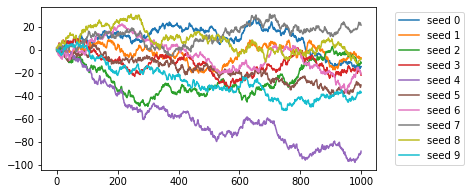

In [98]:
plt.figure(figsize=(6,3))

mu = 0.0
standdev = 1
nRW = 100
lRW = 1000
RW_storage = np.empty((lRW,nRW))

for i in range(nRW):
    np.random.seed(10+i)
    increments = np.random.normal(loc=mu, scale=standdev, size=lRW)
    RW = np.cumsum(increments)
    RW_storage[:,i] = RW # this stores all generated random walks
    
    if i < 10: # else there are too many plots and the image gets bloated
        plt.plot(RW, label="seed "+str(i))
    
plt.legend(bbox_to_anchor=(1.04,1))
plt.savefig("RandomWalks", bbox_inches="tight")
plt.show()

In [99]:
# Check if the scaling for mu and sigma holds

mean, sd = np.zeros(lRW), np.zeros(lRW)
time = np.arange(lRW)

for i in range(lRW):
    mean[i] = np.mean(RW_storage[i,:])  # mean of all Random Walk positions at point i
    sd[i] = np.std(RW_storage[i,:])  # standard deviation of all Random Walk positions at point i

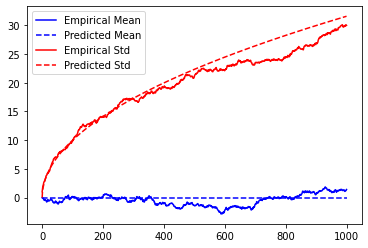

In [100]:
plt.plot(time,mean, label = "Empirical Mean", color = "b")
plt.plot(time, time * mu,linestyle= "dashed", label="Predicted Mean", color = "blue")
plt.plot(time, sd, label = "Empirical Std", color = "r")
plt.plot(time, np.sqrt(time)*standdev, label = "Predicted Std", color = "r", linestyle = "dashed")
plt.legend()
plt.show()

Decent agreement between prediction and numerics!

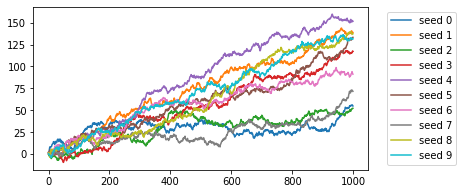

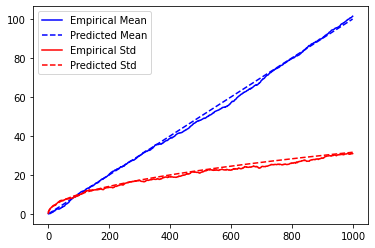

In [102]:
# now another mu
plt.figure(figsize=(6,3))

mu = 0.1 ############## This is the only change to the previous code

RW_storage = np.empty((lRW,nRW))

for i in range(nRW):
    np.random.seed(i)
    increments = np.random.normal(loc=mu, scale=standdev, size=lRW)
    RW = np.cumsum(increments)
    RW_storage[:,i] = RW # this stores all generated random walks
    
    if i < 10: # else there are too many plots and the image gets bloated
        plt.plot(RW, label="seed "+str(i))
    
plt.legend(bbox_to_anchor=(1.04,1))
plt.savefig("RandomWalks", bbox_inches="tight")
plt.show()


# Check if the scaling for mu and sigma holds

mean, sd = np.zeros(lRW), np.zeros(lRW)
time = np.arange(lRW)

for i in range(lRW):
    mean[i] = np.mean(RW_storage[i,:])  # mean of all Random Walk positions at point i
    sd[i] = np.std(RW_storage[i,:])  # standard deviation of all Random Walk positions at point i
    
plt.plot(time,mean, label = "Empirical Mean", color = "b")
plt.plot(time, time * mu,linestyle= "dashed", label="Predicted Mean", color = "blue")
plt.plot(time, sd, label = "Empirical Std", color = "r")
plt.plot(time, np.sqrt(time)*standdev, label = "Predicted Std", color = "r", linestyle = "dashed")
plt.legend()
plt.show()